In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import math
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#load data 

df = pd.read_csv('movie_metadata.csv')
df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4456,Color,David Worth,4.0,91.0,58.0,69.0,Jonathan Mangum,847.0,NaN,Horror|Thriller,...,6.0,English,USA,R,1400000.0,2014.0,147.0,6.9,NaN,223
4158,Black and White,Mel Brooks,129.0,106.0,0.0,481.0,Peter Boyle,1000.0,86300000.0,Comedy,...,315.0,English,USA,PG,2800000.0,1974.0,595.0,8.0,1.85,14000
2226,Color,Edgar Wright,427.0,109.0,1000.0,24.0,Thomas Law,177.0,26003149.0,Action|Comedy|Sci-Fi,...,401.0,English,UK,R,20000000.0,2013.0,55.0,7.0,2.35,49000
1275,Color,Sam Weisman,62.0,90.0,39.0,210.0,Valerie Perri,607.0,28535768.0,Comedy,...,105.0,English,USA,PG-13,40000000.0,1999.0,322.0,5.3,1.85,279
4749,Black and White,Tom DiCillo,10.0,97.0,32.0,329.0,Tina Louise,11000.0,NaN,Comedy|Music|Romance,...,24.0,English,Switzerland,R,500000.0,1991.0,422.0,5.8,1.85,344


In [3]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
df.shape

(5043, 28)

In [5]:
#drop irrelevant columns and rows with null values

df = df.drop(columns = ['color','movie_imdb_link','language','country','movie_title','content_rating'])
df = df.dropna()
df.shape

(3784, 22)

In [6]:
#get columns that are categorical

CategoricalColumns = [c for c in df.columns if df[c].dtype == 'object']

In [7]:
CategoricalColumns

['director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'actor_3_name',
 'plot_keywords']

In [8]:
#for each instance, count its number of appearances in that column

DMCount = df.director_name.value_counts()
A2Count = df.actor_2_name.value_counts()
A1Count = df.actor_1_name.value_counts()
A3Count = df.actor_3_name.value_counts()
GCount = df.genres.value_counts()
KCount = df.plot_keywords.value_counts()

In [9]:
#reset index and change column names

DMCount = pd.DataFrame(DMCount).reset_index().rename(columns = {'index': 'director_name', 'director_name':'DMCount'})
A2Count = pd.DataFrame(A2Count).reset_index().rename(columns = {'index': 'actor_2_name', 'actor_2_name':'A2Count'})
A1Count = pd.DataFrame(A1Count).reset_index().rename(columns = {'index': 'actor_1_name', 'actor_1_name':'A1Count'})
A3Count = pd.DataFrame(A3Count).reset_index().rename(columns = {'index': 'actor_3_name', 'actor_3_name':'A3Count'})
GCount = pd.DataFrame(GCount).reset_index().rename(columns = {'index': 'genres', 'genres':'GCount'})
KCount = pd.DataFrame(KCount).reset_index().rename(columns = {'index': 'plot_keywords', 'plot_keywords':'KCount'})

In [10]:
#merge to df (replace instance with its instance count)

df = pd.merge(df, DMCount, how = 'left')
df = pd.merge(df, A2Count, how = 'left')
df = pd.merge(df, A1Count, how = 'left')
df = pd.merge(df, A3Count, how = 'left')
df = pd.merge(df, GCount, how = 'left')
df = pd.merge(df, KCount, how = 'left')

In [11]:
#drop the categorical columns

df = df.drop(columns = ['director_name','actor_2_name','genres','actor_1_name','actor_3_name','plot_keywords'])

In [12]:
df.head(20)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,DMCount,A2Count,A1Count,A3Count,GCount,KCount
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,936.0,7.9,1.78,33000,7,3,4,3,12,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,5000.0,7.1,2.35,0,7,7,39,4,25,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,393.0,6.8,2.35,85000,8,2,5,1,45,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,23000.0,8.5,2.35,164000,8,5,9,2,22,1
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,632.0,6.6,2.35,24000,3,3,2,1,48,1
5,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,...,11000.0,6.2,2.35,0,12,11,31,7,5,2
6,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,...,553.0,7.8,1.85,29000,1,1,1,2,2,1
7,635.0,141.0,0.0,19000.0,26000.0,458991599.0,462669,92000,4.0,1117.0,...,21000.0,7.5,2.35,118000,4,3,15,4,48,1
8,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,3.0,973.0,...,11000.0,7.5,2.35,10000,4,3,8,3,5,1
9,673.0,183.0,0.0,2000.0,15000.0,330249062.0,371639,24450,0.0,3018.0,...,4000.0,6.9,2.35,197000,8,1,7,1,48,1


<AxesSubplot:>

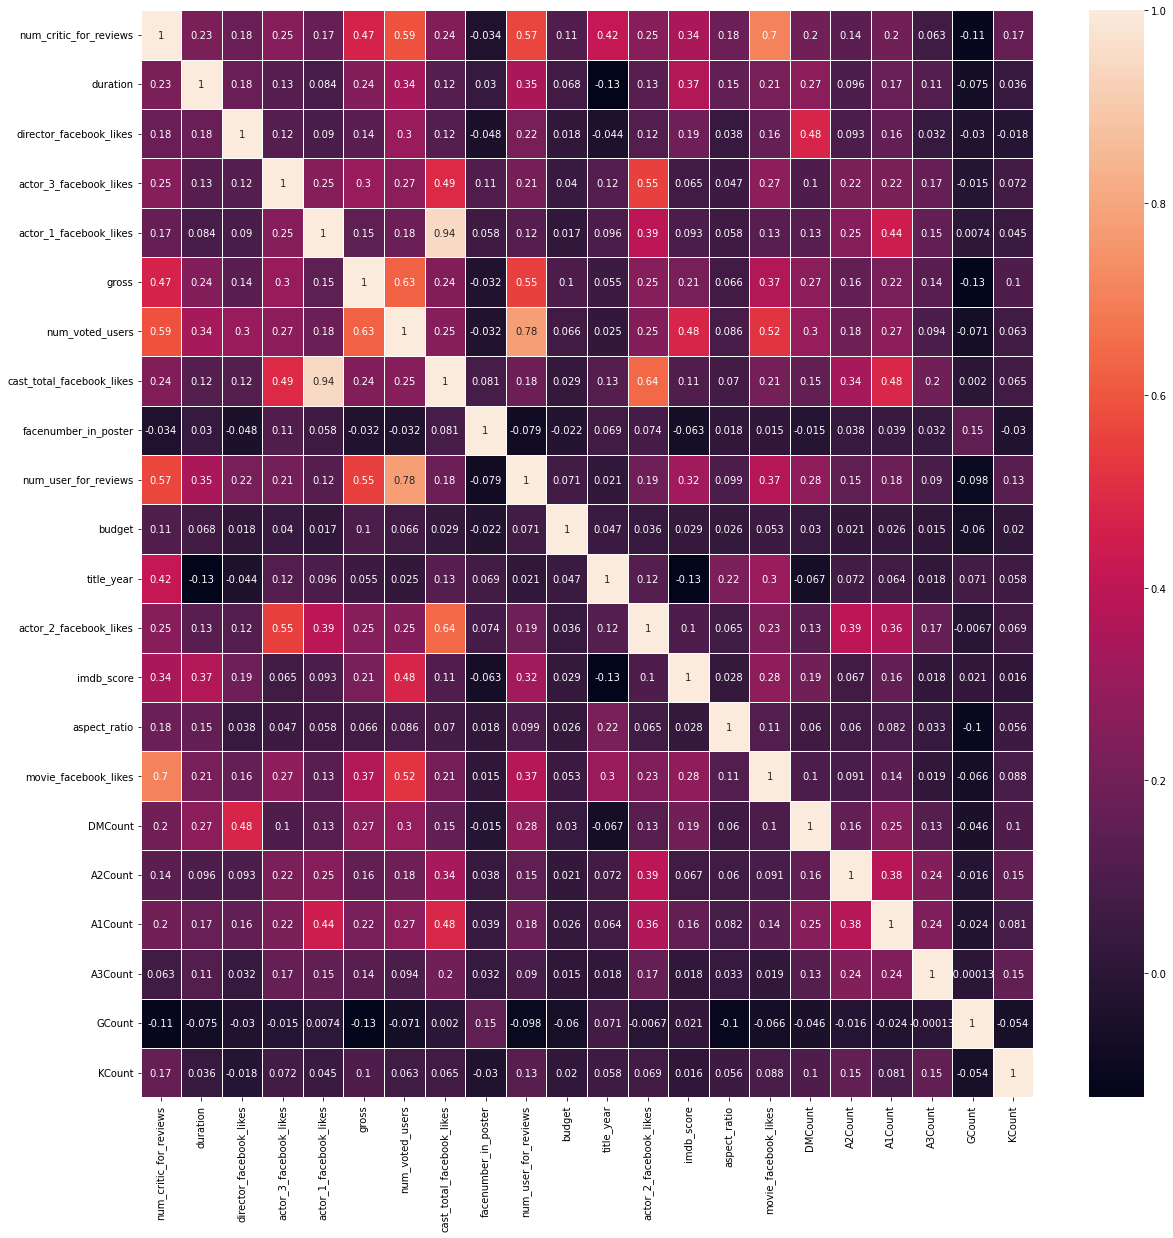

In [13]:
#visualize corrolation

correlations = df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, linewidths=1)

In [14]:
#change all columns to type int

NumericalColumns = [c for c in df.columns if df[c].dtype != 'int64']
for i in NumericalColumns:
    df[i] = df[i].apply(int)

In [15]:
df.dtypes

num_critic_for_reviews       int64
duration                     int64
director_facebook_likes      int64
actor_3_facebook_likes       int64
actor_1_facebook_likes       int64
gross                        int64
num_voted_users              int64
cast_total_facebook_likes    int64
facenumber_in_poster         int64
num_user_for_reviews         int64
budget                       int64
title_year                   int64
actor_2_facebook_likes       int64
imdb_score                   int64
aspect_ratio                 int64
movie_facebook_likes         int64
DMCount                      int64
A2Count                      int64
A1Count                      int64
A3Count                      int64
GCount                       int64
KCount                       int64
dtype: object

In [16]:
#Split data

Y = df.pop('imdb_score')
X = df
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.9, test_size = 0.1)

In [17]:
#ridge regression

RidgeReg = Ridge().fit(Xtrain, Ytrain)
YpredR = RidgeReg.predict(Xtest)
rmse = np.sqrt(mean_squared_error(Ytest, YpredR))

C:\Users\owner\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.70514e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [18]:
rmse

0.9047064679291011

In [19]:
#linear regression

LinearReg = LinearRegression().fit(Xtrain, Ytrain)
YpredL = LinearReg.predict(Xtest)
rmse = np.sqrt(mean_squared_error(Ytest, YpredL))

In [20]:
rmse 

0.9047042348806695

In [21]:
#lasso regression

LassoReg = Lasso().fit(Xtrain, Ytrain)
YpredLS = LassoReg.predict(Xtest)
rmse = np.sqrt(mean_squared_error(Ytest, YpredLS))

C:\Users\owner\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.439e+03, tolerance: 4.060e-01
  model = cd_fast.enet_coordinate_descent(


In [22]:
rmse

0.9171879866044319

In [23]:
#random forest regression

RandomForestReg = RandomForestRegressor().fit(Xtrain,Ytrain)
YpredRF = RandomForestReg.predict(Xtest)
rmse = np.sqrt(mean_squared_error(Ytest, YpredRF))

In [24]:
rmse

0.7564018769624355

In [25]:
#Linear SVC

SVC = SVC().fit(Xtrain, Ytrain)
YpredS = SVC.predict(Xtest)
SVCscore = SVC.score(Xtrain, Ytrain)

In [26]:
SVCscore

0.3841409691629956

In [27]:
#knn

KNN = KNeighborsClassifier().fit(Xtrain, Ytrain)
YpredK = KNN.predict(Xtest)
KNNscore = KNN.score(Xtrain, Ytrain)

C:\Users\owner\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\owner\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [28]:
KNNscore

0.5336270190895741

In [29]:
#gaussian naive bayes

GNaiveBayes = GaussianNB().fit(Xtrain, Ytrain)
YpredG = GNaiveBayes.predict(Xtest)
GNBscore = GNaiveBayes.score(Xtrain, Ytrain)

In [30]:
GNBscore

0.2102790014684288